# IRIS FOLWER PERDICTION

### Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle

### Load Data Set

In [105]:
df = sns.load_dataset('iris')
df=pd.DataFrame(df)
df.head()
#seaborn alreday havvr iris dataset in his library

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Preprocessing

In [106]:
df.columns
#we have 5 coloums 
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
#perdicted coloumn is species it is multiclassification problem

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [107]:
df["species"].unique()
#this is multi classification problem
#we have three values for perdiction :'setosa', 'versicolor', 'virginica'

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [135]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [110]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [111]:
df.duplicated().sum()

1

In [112]:
df = df.drop_duplicates(keep="last")

In [113]:
df.duplicated().sum()

0

In [114]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

### Data Visulization

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 49.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

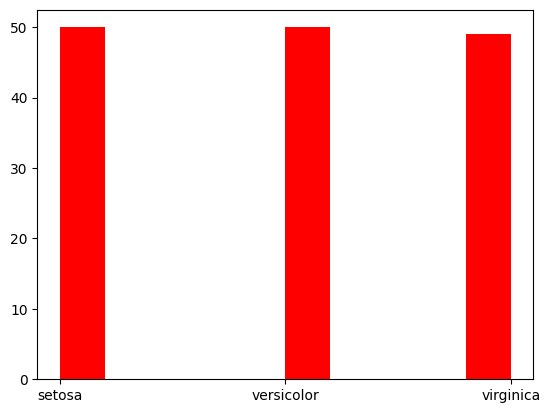

In [115]:
plt.hist(df["species"],color='red')

#### Scatter plot

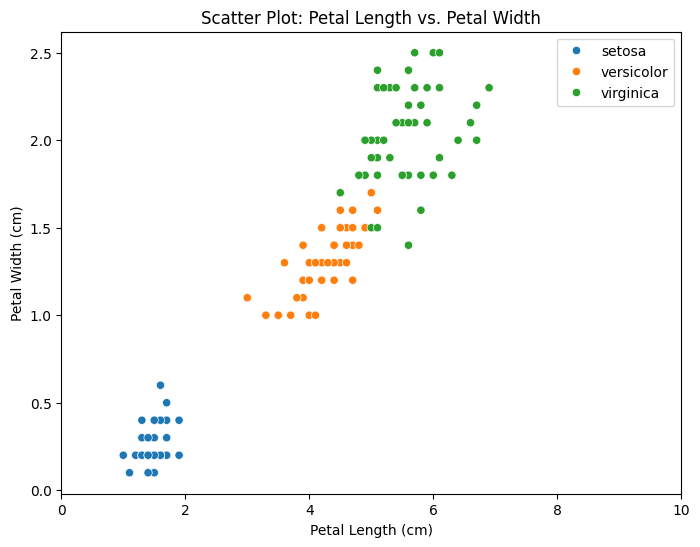

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title('Scatter Plot: Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.xlim([0,10])
plt.show()


####  Pair plot

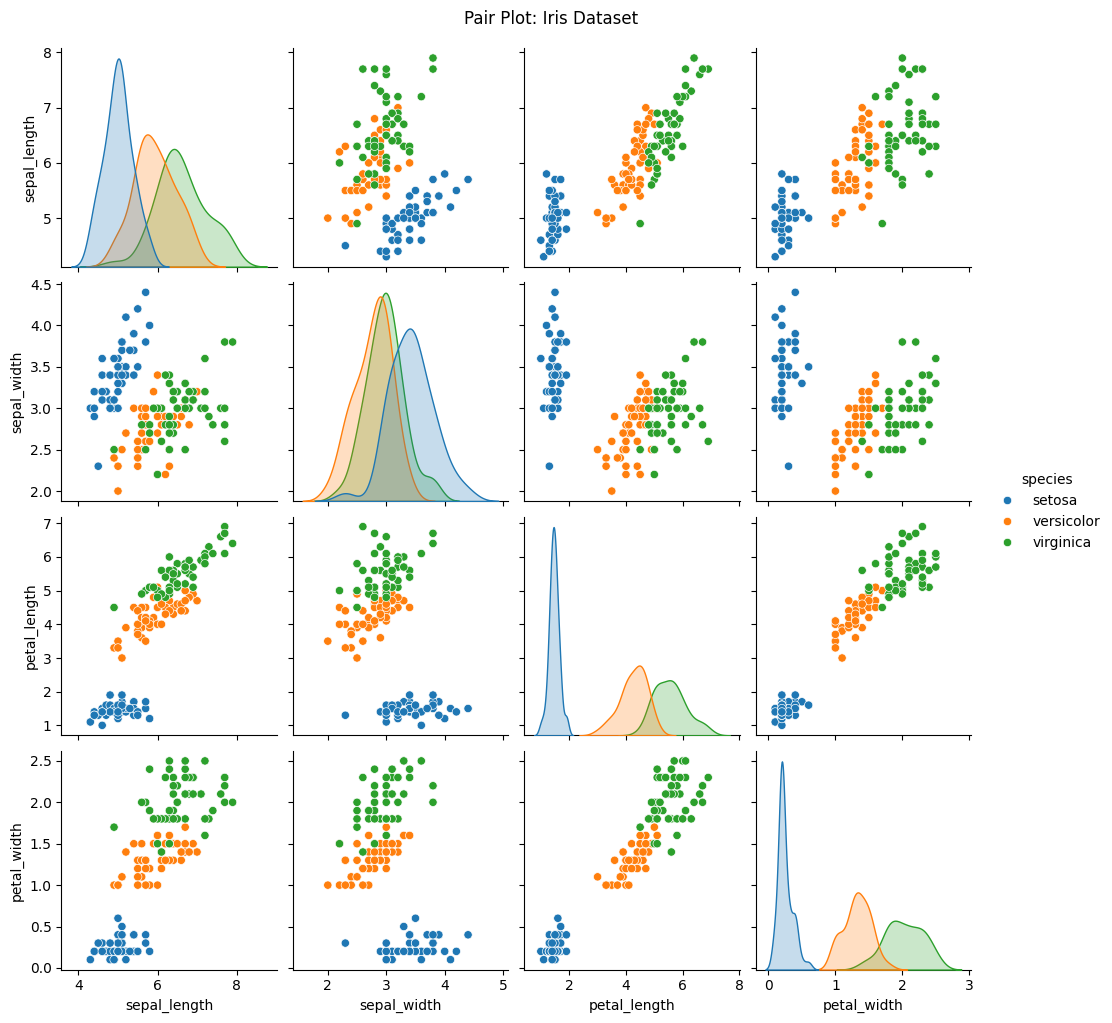

In [117]:
sns.pairplot(df, hue='species', markers='o')
plt.suptitle('Pair Plot: Iris Dataset', y=1.02)
plt.show()


#### Histogram 

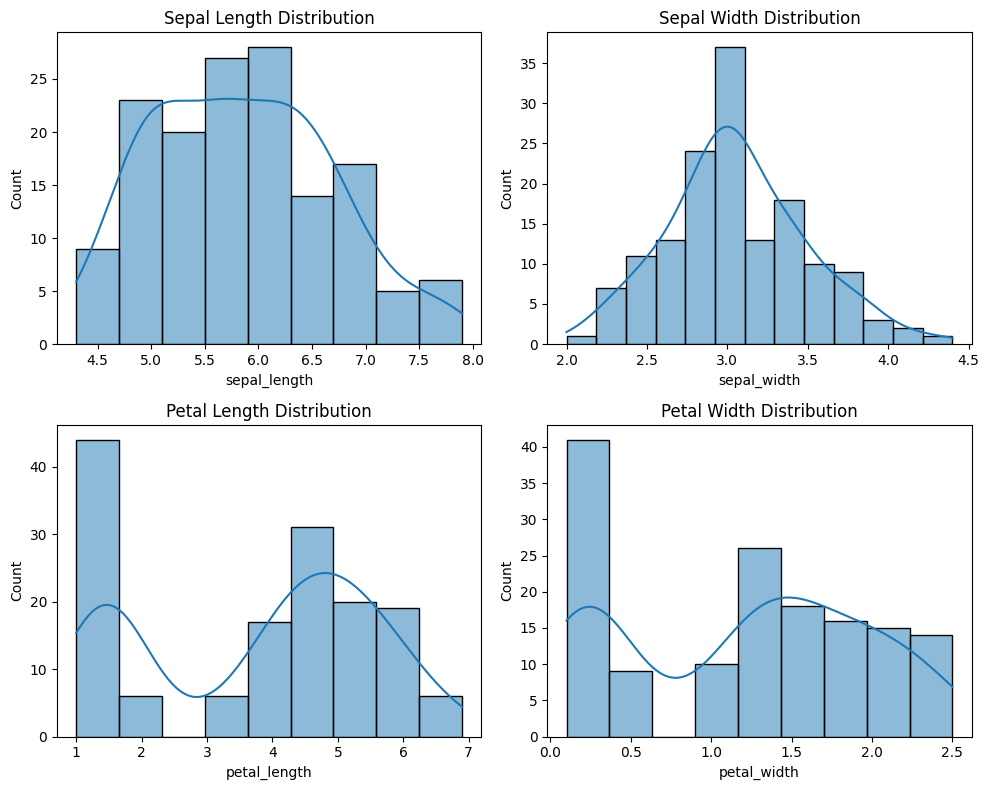

In [118]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['sepal_length'], kde=True)
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal_width'], kde=True)
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['petal_length'], kde=True)
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['petal_width'], kde=True)
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()

#### Bar plot for average sepal length 

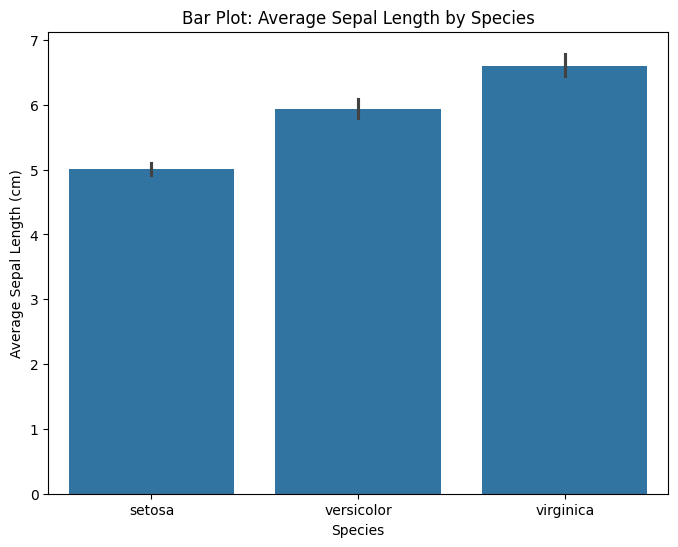

In [119]:
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='sepal_length', data=df)
plt.title('Bar Plot: Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.show()

#### Bar plot for average sepal width

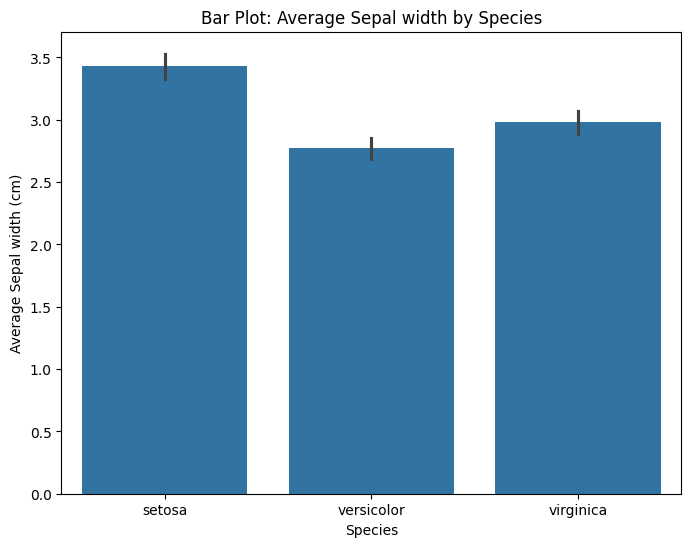

In [120]:
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='sepal_width', data=df)
plt.title('Bar Plot: Average Sepal width by Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal width (cm)')
plt.show()

#### Bar plot for average  petal_length

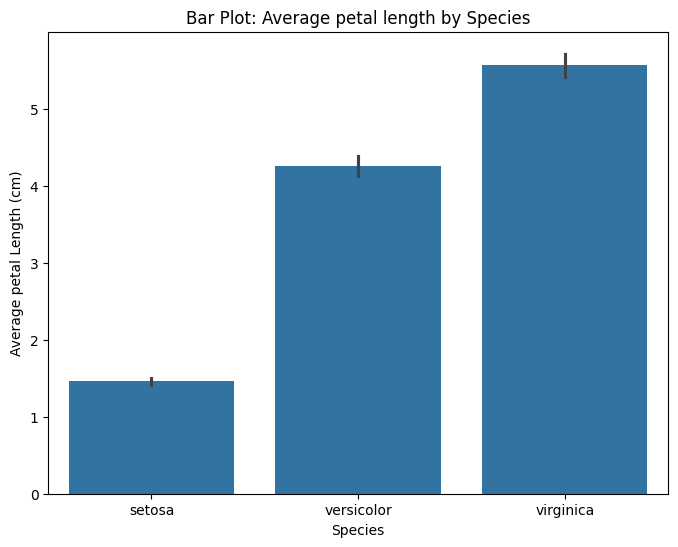

In [121]:
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal_length', data=df)
plt.title('Bar Plot: Average petal length by Species')
plt.xlabel('Species')
plt.ylabel('Average petal Length (cm)')
plt.show()

#### Bar plot for average  petal_width

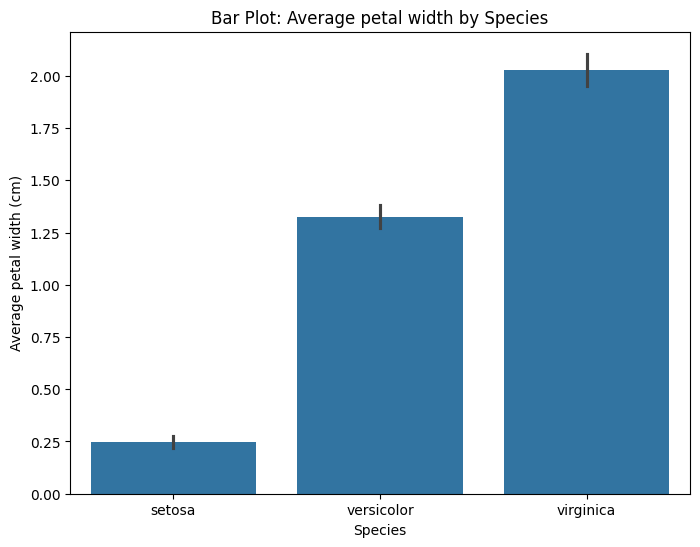

In [122]:
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal_width', data=df)
plt.title('Bar Plot: Average petal width by Species')
plt.xlabel('Species')
plt.ylabel('Average petal width (cm)')
plt.show()

### Correlation Matrix

In [123]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

/tmp/ipykernel_6980/1973928281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


### HeatMap

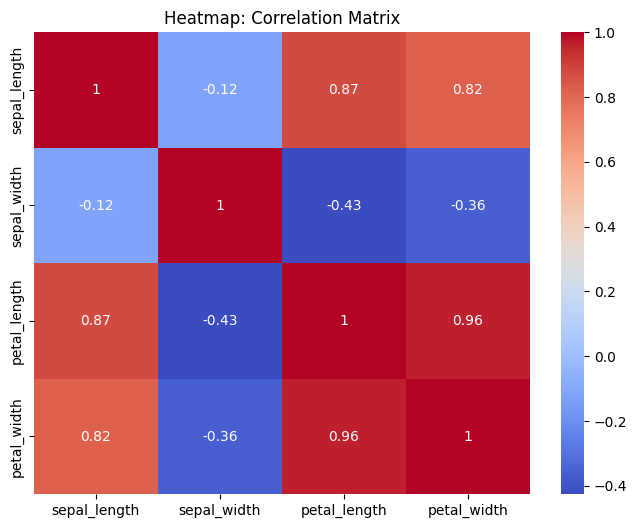

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

## Feature Engineering

#### Scaling

In [125]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [126]:
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

scaler_minmax = MinMaxScaler()
df[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

In [127]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,0.428784,0.441555,0.465931,0.456096
std,0.230792,0.181809,0.299626,0.317759
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.559322,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [128]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


# Model Traing


In [129]:
x = df.drop('species', axis=1)
y=df["species"]

### Train Test Split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logestic Regression

In [131]:
logestic = LogisticRegression()

logestic .fit(X_train, y_train)

y_pred = logestic.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_train = logestic.predict(X_train)

training_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {training_accuracy}")

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Training Accuracy: 0.9327731092436975


### Decision Tree Classifier

In [132]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_train = DecisionTree.predict(X_train)

training_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {training_accuracy}")

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Training Accuracy: 1.0


### Random Forest Classifier

In [133]:
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)  

RandomForest.fit(X_train, y_train)

y_pred =RandomForest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_train = RandomForest.predict(X_train)

training_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {training_accuracy}")

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Training Accuracy: 1.0


## Save all models For deployment Purpose

In [134]:
#Logestic Regression mode
pickle.dump(logestic , open("logestic.pkl", "wb"))

#Decision Tree classifier
pickle.dump(DecisionTree , open("DecisionTree.pkl", "wb"))

#Random Forest Classifier
pickle.dump(RandomForest, open("RandomForest.pkl", "wb"))
